# Описание датасета

**Предметная область**: Обзор рынка недвижимости США

**Источник данных**: [Kaggle: USA House Prices](https://www.kaggle.com/datasets/fratzcan/usa-house-prices)

**Характер данных**: Реальные 

**Атрибуты**:
- `Date` (строковый): Дата продажи недвижимости. Этот атрибут помогает понять
временные тенденции цен на недвижимость.

- `Price` (числовой): Цена продажи недвижимости в долларах США. Это целевая переменная, к которой мы стремимся
предсказывать.

- `Bedrooms` (числовой): Количество спален в доме. Как правило, недвижимость с
Чем больше спален, тем выше цена.

- `Bathrooms` (числовой): Количество ванных комнат в доме. Подобно спальням,
Больше ванных комнат может увеличить стоимость недвижимости.

- `Sqft Living` (числовой): Размер жилой площади в квадратных футах. Большие жилые площади
обычно связаны с более высокой стоимостью недвижимости.

- `Sqft Lot` (числовой): Размер участка в квадратных футах. Большие участки могут повысить
привлекательность и стоимость объекта недвижимости.

- `Floors` (числовой): Количество этажей в доме. Многоквартирные дома могут
быть более жилыми и привлекательными.

- `Waterfront` (числовой): Бинарный индикатор (1, если недвижимость имеет вид на набережную, 0 -
в противном случае). Недвижимость с видом на набережную часто оценивается выше.

- `View` (числовой): Индекс от 0 до 4, указывающий на качество обзора объекта. Лучшие
виды, скорее всего, повышают стоимость объекта.

- `Condition` (числовой): Состояние недвижимости оценивается по индексу от 1 до 5. Недвижимость
в лучшем состоянии, как правило, стоит дороже.

- `Sqft Above` (числовой): Площадь помещения над цокольным этажом. 
Может помочь в оценке ценности надземного пространства.

- `Sqft Basement` (числовой): Площадь подвала. Подвалы могут быть более значимыми в зависимости от их удобства использования.

- `Yr Built` (числовой): Год постройки объекта недвижимости. Старые объекты недвижимости могут представлять историческую
ценность, в то время как новые могут предлагать современные удобства.

- `Yr Renovated` (числовой): Год последней реконструкции недвижимости. Недавний ремонт может
повысить привлекательность и стоимость объекта недвижимости.

- `Street` (строковый): Уличный адрес объекта недвижимости. Этот атрибут можно использовать для анализа
ценовых тенденций в зависимости от местоположения.

- `City` (строковый): город, в котором находится объект недвижимости. В разных городах динамика рынка различна.

- `Statezip` (строковый): штат и почтовый индекс объекта недвижимости. Этот атрибут обеспечивает региональный контекст для объекта недвижимости.

- `Country` (строковый): Страна, в которой находится объект недвижимости. Однако в данном наборе данных основное внимание
уделяется объектам недвижимости в США. Атрибут введён для полноты.
...

**Задача анализа**:
Рассмотреть рынок недвижимости в США, так как он имеет большое значение как для местных, так и для международных инвесторов.

`1.` Импортируем необходимые библиотеки:
- `Pandas` - библиотека для анализа и манипуляции данными.
- `Matplotlib` - библиотека для визуализации данных в Python.
- `sklearn` - Метод KMeans из данной библиотеки необходим для кластеризации.
- `numpy` - это библиотека, предоставляющая поддержку работы с многомерными массивами и математическими функциями.

In [835]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

`2.` Загрузим рассматриваемый датасет, добавив новый атрибут `Price per Sqft` (цена за квадратный фут):

In [836]:
df = pd.read_csv('USA_Housing_Dataset.csv')
df['price_per_sqft'] = df['price'] / df['sqft_living']

Для каждого атрибута определим и обработаем:
- `Количество пропущенных значений`
- `Выбросы`
- `Дубли`

`3.` Реализуем функцию для поиска выбросов. Рассчитаем нижнюю и верхнюю границу. Таким образом, если значение выходит за рамки границ, то оно считается выбросом:

In [837]:
def finding_outliers(df, col):
    q1 = df[col].quantile(0.25)                     # Значение, ниже которого находится 25% данных
    q3 = df[col].quantile(0.75)                     # Значение, ниже которого находится 75% данных
    iqr = q3 - q1                                   # Показатель того, насколько широко распределены средние 50% данных

    lower_bound = q1 - 1.5 * iqr                    # Нижняя граница
    upper_bound = q3 + 1.5 * iqr                    # Верхняя граница

    # Таким образом, значения ниже нижней границы или выше верхней границы считаются выбросами
    # Строки с такими значениями (выбросами) заносим в новый dataframe
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f'Количество выбросов до удаления: {outliers.shape[0]}')

    # Выбираем все строки, где значение в столбце не является выбросом
    df_cleaned = df[~((df[col] < lower_bound) | (df[col] > upper_bound))]

    outliers = df_cleaned[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)]
    print(f'Количество выбросов после удаления: {outliers.shape[0]}')
    
    return df_cleaned

`4.` Реализуем функции для поиска пропущенных значений (числовых и строковых)

In [838]:
def finding_missing_number_values(col):
    # Проверка пропущенных значений
    missing_values = df[col].isnull().sum()
    print(f'Пропущенные числовые значения: {missing_values}')

    if missing_values > 0:
        df[col].fillna(df[col].mean(), inplace=True)

def finding_missing_string_values(col):
    # Проверка пропущенных значений
    missing_values = df[col].isnull().sum()
    print(f'Пропущенные строковые значения: {missing_values}')

    if missing_values > 0:
        df[col].fillna("None", inplace=True)

`4.1.` Реализуем функцию для исправления кривых значений (отрицательных) на среднее

In [839]:
def fix_crooked_value(col):   
    negative_values = df[col] < 0
    if negative_values.any():
        df[col].fillna(df[col].mean(), inplace=True)


`5.` 'Причешем' наш датасет (Удалим дубликаты, а также выделим столбцы с числовыми значениями и столбцы со строковыми)

In [840]:
# Удаление дубликатов
df.drop_duplicates(inplace=True)

# Выборка числовых столбцов
number_cols = df.select_dtypes(include='number')

# Выборка строковых столбцов
string_cols = df.select_dtypes(include='object')

`6.` Циклом переберём все столбцы с числовым и строковым типом данных (найдём и удалим выбросы, а также обработаем пропущенные значения для чисел и строк)

In [841]:
print('Обработка числовых значений:')
for col in number_cols:
    print(f'\n\nАтрибут: {col}')
    print(f'Среднее значение: {df[col].mean()}')
    print(f'Средневадратическое отклонение: {df[col].std()}')
    
    # Поиск выбросов
    df = finding_outliers(df, col)
    
    # Поиск и исправление пропущенных значений
    finding_missing_number_values(col)

    # Поиск и исправление кривых значений (отрицательных)
    fix_crooked_value(col)

print('Обработка строковых значений:')
for col in string_cols:   
    print(f'\n\nАтрибут: {col}')

    # Поиск и исправление пропущенных значений
    finding_missing_number_values(col)

Обработка числовых значений:


Атрибут: price
Среднее значение: 553062.8772890784
Средневадратическое отклонение: 583686.4522446232
Количество выбросов до удаления: 215
Количество выбросов после удаления: 0
Пропущенные числовые значения: 0


Атрибут: bedrooms
Среднее значение: 3.3602547770700637
Средневадратическое отклонение: 0.8851763338475588
Количество выбросов до удаления: 94
Количество выбросов после удаления: 0
Пропущенные числовые значения: 0


Атрибут: bathrooms
Среднее значение: 2.1029757243539544
Средневадратическое отклонение: 0.7155492470808746
Количество выбросов до удаления: 62
Количество выбросов после удаления: 0
Пропущенные числовые значения: 0


Атрибут: sqft_living
Среднее значение: 2009.5327673122845
Средневадратическое отклонение: 763.9435516148674
Количество выбросов до удаления: 53
Количество выбросов после удаления: 0
Пропущенные числовые значения: 0


Атрибут: sqft_lot
Среднее значение: 13715.82508073197
Средневадратическое отклонение: 35201.44026768022
Количе

`6.` Построим графики зависимости одной переменной от другой, применив метод кластеризации KMeans:

`6.1.` Выберем количество кластеров (N) на основе инерции (квадрат расстояния между центроидами и точками данных должен быть меньше). По графику выберем такое количество кластеров, где инерция практически не меняется (в данном случае - 5)

In [842]:
# Выбор N кластеров на основе инерции (квадрат расстояния между центроидами и точками данных должен быть меньше)
def choosing_clusters(X1):
    inertia = []
    for n in range(1 , 11):
        algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10, max_iter=300, 
                    tol=0.0001,  random_state= 111, algorithm='lloyd'))
        algorithm.fit(X1)
        inertia.append(algorithm.inertia_)

    plt.figure(1 , figsize = (6 ,4))
    plt.plot(np.arange(1 , 11) , inertia , 'o')
    plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
    plt.xlabel('Количество кластеров') , plt.ylabel('Инерция')
    plt.show()

`6.2.` Выберем начальные центроиды с помощью метода k-means++:
Первый центроид выбирается случайно, а затем выбираются остальные центроиды с вероятностью, 
пропорциональной квадрату расстояния до ближайшего уже выбранного центроида.

In [843]:
def choosing_centroids(X1):
    # # n_cluster - количество кластеров; init - метод инициализации (k-means++)
    # # n_init - Количество запусков алгоритма с разными начальными позициями центроидов
    # # max_iter - Максимальное количество итераций для одного запуска
    # # algorithm - Используем алгоритм Elkan для более быстрой работы
    algorithm = (KMeans(n_clusters = 6, init='k-means++', n_init = 10, max_iter = 300, 
        tol = 0.0001, random_state = 111, algorithm='elkan'))

    # Метод fit() в Scikit-Learn используется для обучения модели 
    algorithm.fit(X1)
    labels1 = algorithm.labels_
    centroids1 = algorithm.cluster_centers_

    return algorithm, labels1, centroids1

`6.3.` Подготовим данные для визуализации работы алгоритма на плоскости, затем визуализируем (создаём фигуру, отображаем изображение):

In [844]:
def visualization(X1, algorithm, labels, centroids, col):
    # Задаём шаг сетки, который будет использован для построения двумерной сетки значений, 
    # необходимой для визуализации результатов алгоритма.
    h = 5.0

    # Определение минимума и максимума для осей:
    x_min, x_max = X1[:, 0].min() - 10.0, X1[:, 0].max() + 10.0
    y_min, y_max = X1[:, 1].min() - 10.0, X1[:, 1].max() + 10.0

    # Генерируем двумерную сетку координат с использованием функции meshgrid()
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Предсказание значений для сетки
    Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

    # Создание фигуры
    plt.figure(1 , figsize = (12 , 6))
    plt.clf()

    # Переформатирование массива Z для корректного отображения на сетке
    Z = Z.reshape(xx.shape)

    # Отображение изображения кластеров (extent - размеры, cmap - цвет)
    plt.imshow(Z , interpolation='nearest', 
            extent=(xx.min(), xx.max(), yy.min(), yy.max()),
            cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

    # Создание диаграммы для данных из нашего датасета
    plt.scatter(x = 'price', y = col , data = df , c = labels , s = 40 )
    plt.scatter(x = centroids[: , 0] , y =  centroids[: , 1] , s = 120 , c = 'red' , alpha = 0.5)
    plt.ylabel(col) , plt.xlabel('Price')
    plt.show()

`6.4.` Скорректируем типы данных в нашем датасете, ибо для некоторых данных выделено слишком много памяти из-за чего работать с ними становится проблематично

In [845]:
# Для справки выведем размеры датасета
# Также выведем типы данных полей
print(df.shape)
print(df.dtypes)

df = df.astype({
    'date': 'object',
    'price': 'int32',
    'bedrooms': 'float16',
    'bathrooms': 'float16',
    'sqft_living': 'int16',
    'sqft_lot': 'int32',
    'floors': 'float16',
    'waterfront': 'uint8',
    'view': 'uint8',
    'condition': 'uint8',
    'sqft_above': 'int16',
    'sqft_basement': 'int16',
    'yr_built': 'int16',
    'yr_renovated': 'int16',
    'street': 'object',
    'city': 'object',
    'statezip': 'object',
    'country': 'object',
    'price_per_sqft': 'float16'
})

# Проверим
print(f'\n\n{df.dtypes}')

(2944, 19)
date               object
price             float64
bedrooms          float64
bathrooms         float64
sqft_living         int64
sqft_lot            int64
floors            float64
waterfront          int64
view                int64
condition           int64
sqft_above          int64
sqft_basement       int64
yr_built            int64
yr_renovated        int64
street             object
city               object
statezip           object
country            object
price_per_sqft    float64
dtype: object


date               object
price               int32
bedrooms          float16
bathrooms         float16
sqft_living         int16
sqft_lot            int32
floors            float16
waterfront          uint8
view                uint8
condition           uint8
sqft_above          int16
sqft_basement       int16
yr_built            int16
yr_renovated        int16
street             object
city               object
statezip           object
country            object
price_per_s

`6.5.` Теперь визуализируем графики зависимости целевой переменной - `price` от некоторых других

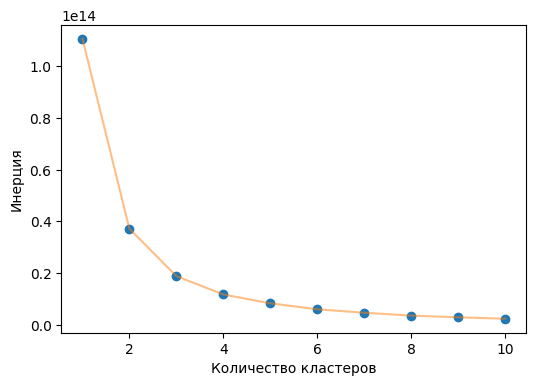

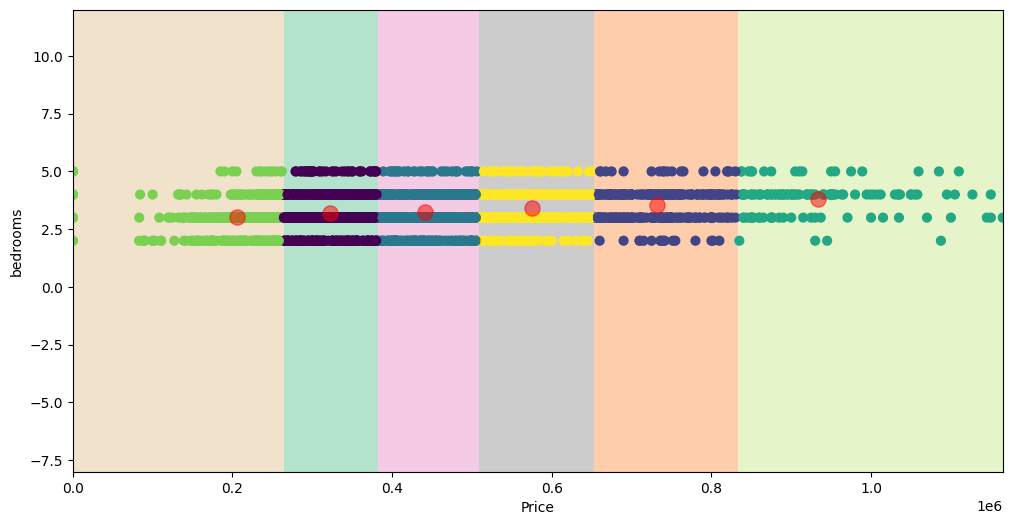

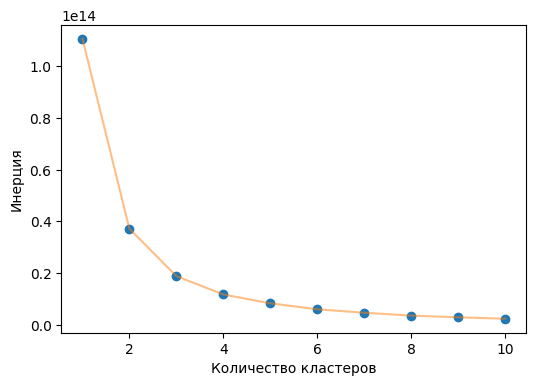

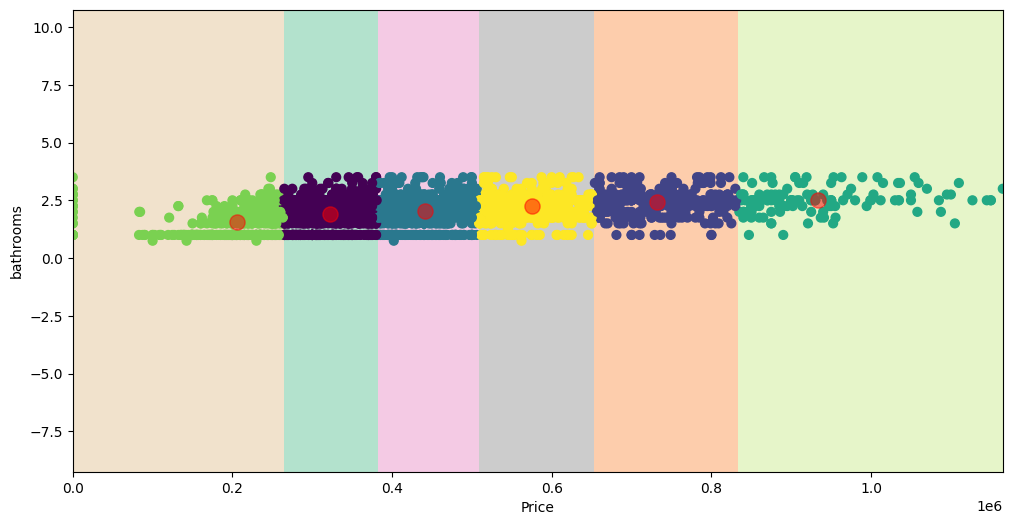

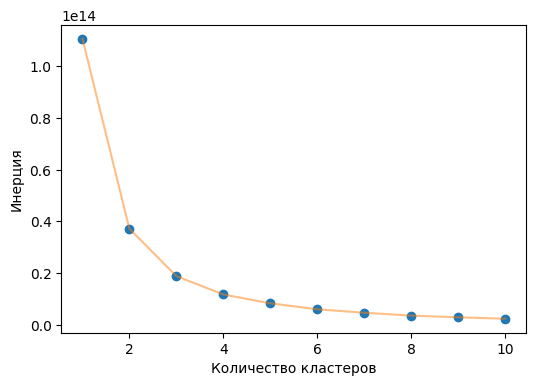

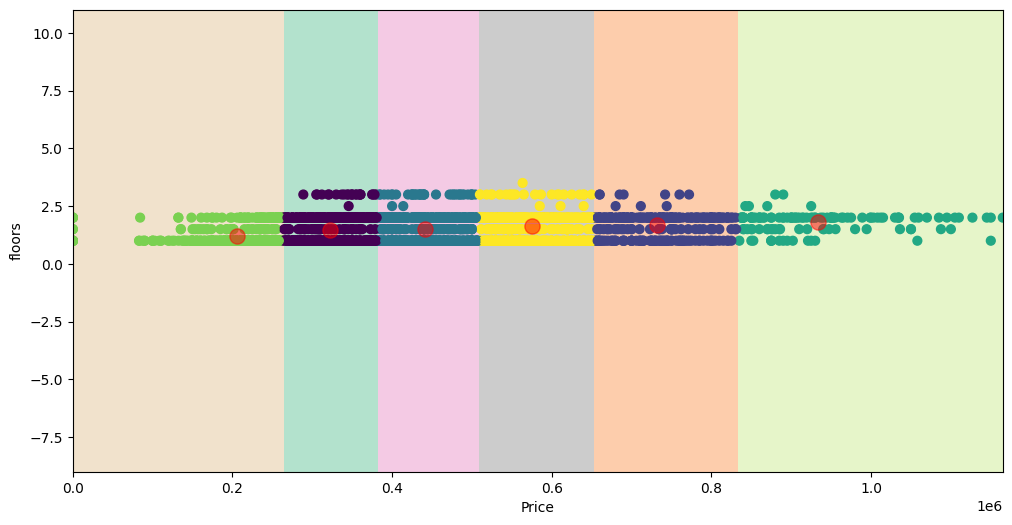

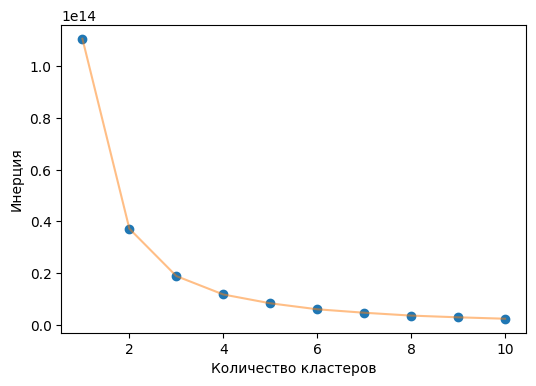

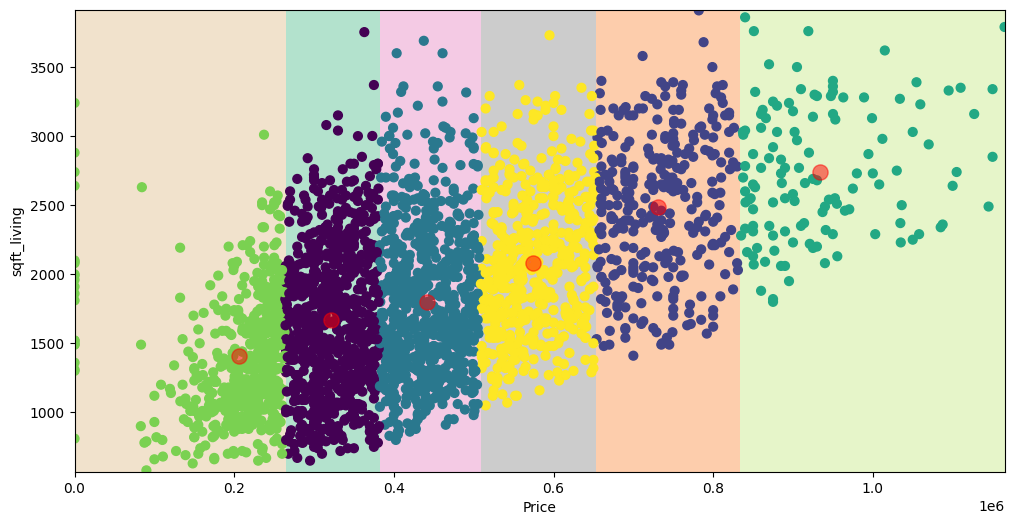

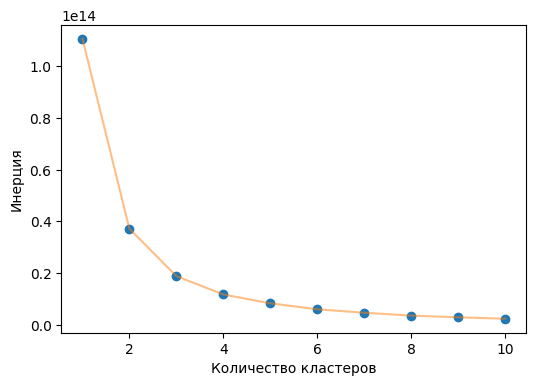

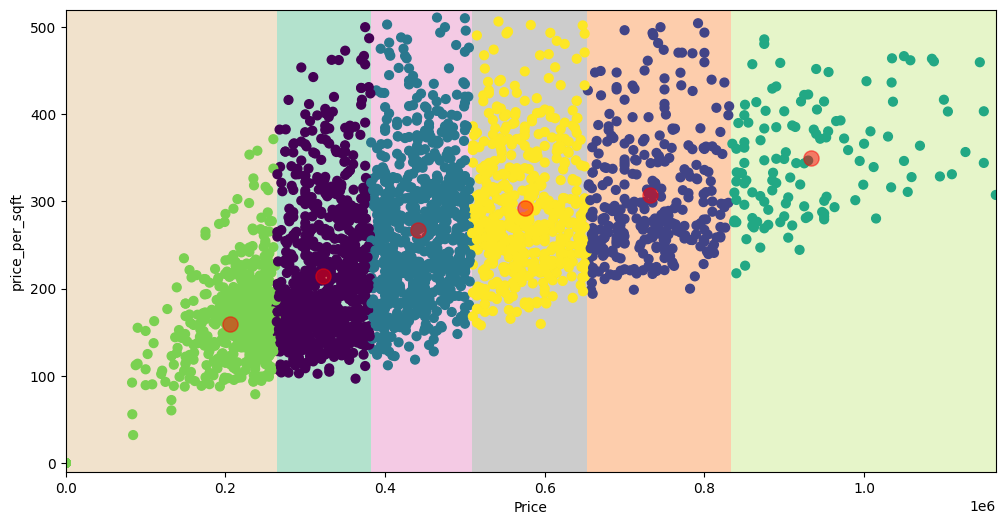

In [846]:
temp_cols = ['bedrooms', 'bathrooms', 'floors', 'sqft_living', 'price_per_sqft']

for tcol in temp_cols:
    X1 = df[['price', tcol]].iloc[: , :].values

    choosing_clusters(X1)
    algorithm, labels, centroids = choosing_centroids(X1)
    visualization(X1, algorithm, labels, centroids, tcol)
    

`7.` Выводы:
В ходе работы исследуемый датасет был почищен от выбросов и дубликатов; пропущенные значения были обработаны. Добавлен новый атрибут. Также для дальнейшей работы были скорректированы типы данных для каждого атрибута.

Построены графики зависимости одной переменной (`price`) от некоторых других (`bedroom`, `bathroom`, `floors`, `sqft_living`, `price_per_sqft`). Применён метод кластеризации KMeans. По первым трём атрибутам (количество спален, ванных, этажей) мало, что можно сказать; все группы примерно одинаковые и находятся примерно на одном уровне.

Более интересная зависимость - цена и размер жилой площади, на графике ярко выражена зависимость, чем больше площадь - тем выше цена дома. Большая часть записей (домов) относятся к группам 2, 3, 4 (наибольшая плотность). Соответственно, и зависимость `price` и `price_per_sqft` (цена за квадратный фунт) ведёт себя примерно также.

